In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '../bills.csv'
file_path_2 = 'venues.csv'
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path_2)

In [4]:
df = df[['venue_xref_id','business_date','bill_total_billed','order_take_out_type_label',]]
df2 = df2[['venue_xref_id','city']]
merged_df = pd.merge(df, df2, on='venue_xref_id', how='inner')


In [ ]:
merged_df

In [6]:
merged_df.to_csv('Q6.csv',index=False)

In [ ]:
grouped_df = merged_df.groupby(['city', 'business_date'])['bill_total_billed'].sum().reset_index()
grouped_df

In [ ]:
merged_df['order_take_out_type_label'] = merged_df['order_take_out_type_label'].str.lower()

# Aggregate data: you might pivot the table to have separate columns for dine-in and delivery counts.
pivot = merged_df.pivot_table(
    index=['business_date', 'venue_xref_id', 'city'],
    columns='order_take_out_type_label',
    values='bill_total_billed',
    aggfunc='count',  # Counting orders; you can also aggregate sums if needed
    fill_value=0
).reset_index()

# Rename columns for clarity (adjust if your column names differ)
pivot.columns.name = None
pivot.rename(columns={'dinein': 'dine_in_count', 'delivery': 'delivery_count'}, inplace=True)

pivot.head()

In [ ]:
cities_to_keep = ['Toronto', 'Vancouver', 'Ottawa', 'Calgary', 'Edmonton', 'Houston', 'Banff', 'Mississauga', 'Victoria', 'Denver']

# Filter the DataFrame
filtered_df = pivot[pivot['city'].isin(cities_to_keep)]

filtered_df

In [ ]:
import requests

api_key = "5ee430391d95459093425110252402"  # Replace with your actual API key

# Function to fetch precipitation data for a city
def get_historical_precipitation(city, date):
    base_url = "http://api.weatherapi.com/v1/history.json"
    params = {
        'key': api_key,
        'q': city,  # Query by city name
        'dt': date  # Date in yyyy-MM-dd format
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        weather_data = response.json()
        # Extract precipitation in millimeters (mm)
        if 'forecast' in weather_data and 'forecastday' in weather_data['forecast']:
            return weather_data['forecast']['forecastday'][0]['day'].get('totalprecip_mm', 0)
    else:
        print(f"Failed to fetch historical data for {city} on {date}: {response.status_code}")
        return None

# Add precipitation column to the DataFrame
filtered_df['precipitation'] = filtered_df.apply(lambda row: get_historical_precipitation(row['city'], row['business_date']), axis=1)

# Filter out rows where precipitation is NaN
filtered_df = filtered_df.dropna(subset=['precipitation'])

print(filtered_df)

In [17]:
filtered_df.to_csv('Q6_ultimate.csv', index = False)

In [ ]:
filtered_df

In [21]:
! pip install scipy
! pip install pearsonr

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Correlation between precipitation and delivery orders: -0.01
Correlation between precipitation and dine-in traffic: -0.01


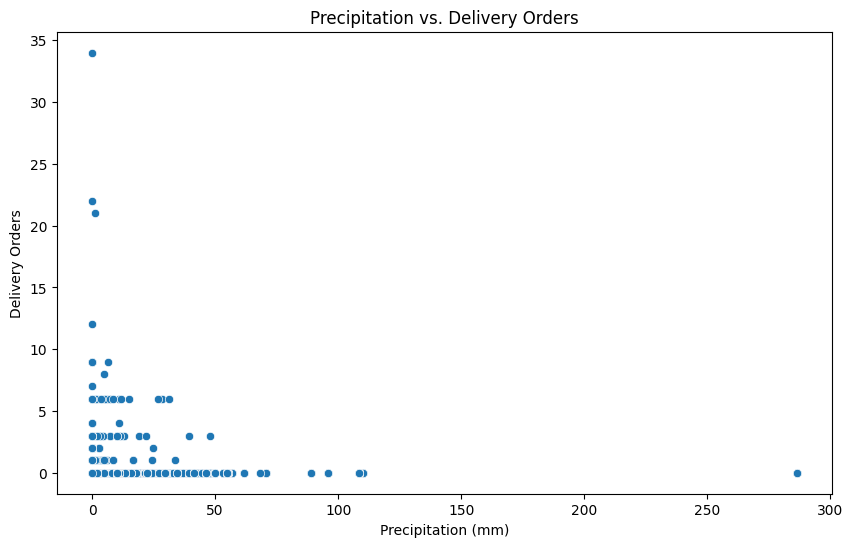

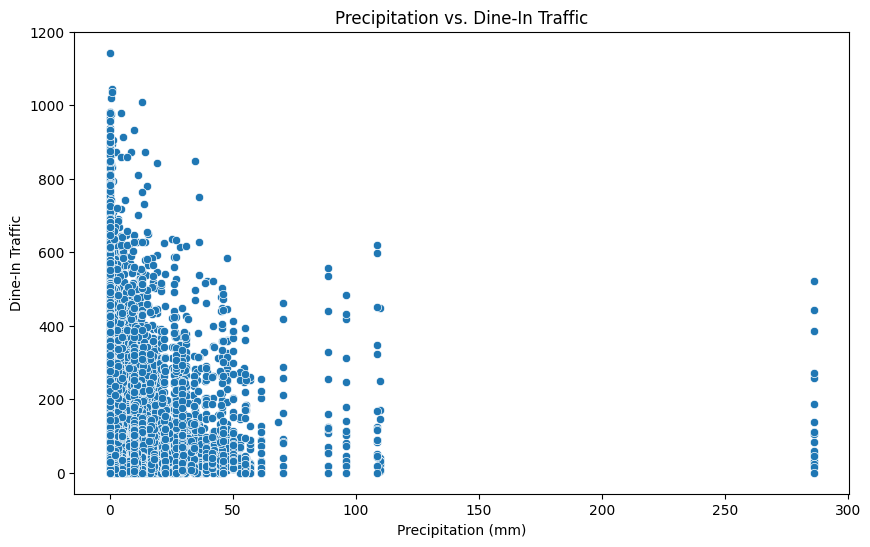

In [24]:


from scipy.stats import pearsonr
filtered_df['precipitation'] = pd.to_numeric(filtered_df['precipitation'], errors='coerce')

# Analyze correlations
# Correlation between precipitation and delivery orders
corr_precip_delivery, _ = pearsonr(filtered_df['precipitation'], filtered_df['delivery_count'])
print(f"Correlation between precipitation and delivery orders: {corr_precip_delivery:.2f}")

# Correlation between precipitation and dine-in traffic
corr_precip_dine_in, _ = pearsonr(filtered_df['precipitation'], filtered_df['dine_in_count'])
print(f"Correlation between precipitation and dine-in traffic: {corr_precip_dine_in:.2f}")

# Visualize relationships
# Precipitation vs. Delivery Orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precipitation', y='delivery_count', data=filtered_df)
plt.title('Precipitation vs. Delivery Orders')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Delivery Orders')
plt.show()

# Precipitation vs. Dine-In Traffic
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precipitation', y='dine_in_count', data=filtered_df)
plt.title('Precipitation vs. Dine-In Traffic')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Dine-In Traffic')
plt.show()

